In [1]:
# Mòduls

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dades

covid = pd.read_json('https://analisi.transparenciacatalunya.cat/resource/jj6z-iyrp.json?MunicipiCodi=08211',
                     dtype={'data':str, 'numcasos':int})

In [3]:
# Preparació de dades

# Selecció de columnes
covid = covid.loc[:,['data','resultatcoviddescripcio', 'numcasos']]

# Dades temporals
covid['data'] = pd.to_datetime(covid['data'], format="%Y-%m-%dT%H:%M:%S.%f")
covid['any'] = covid['data'].apply(lambda x: x.year)
covid['mes'] = covid['data'].apply(lambda x: x.month)
covid['setmana'] = covid['data'].apply(lambda x: x.strftime("%V"))
covid['dia'] = covid['data'].apply(lambda x: x.day)
covid['data'] = covid['data'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [4]:
# Agregació de dades

# Positius per setmana
positius = covid.loc[covid['resultatcoviddescripcio']!='Sospitós',:]
positius_setmana = positius[['setmana','numcasos']].groupby(['setmana'], as_index = False).sum()

# Casos totals per setmana
casos_setmana = covid[['setmana','numcasos']].groupby(['setmana'], as_index = False).sum()

# Eliminem primera setmana
casos_setmana = casos_setmana[2:]
positius_setmana = positius_setmana[1:]

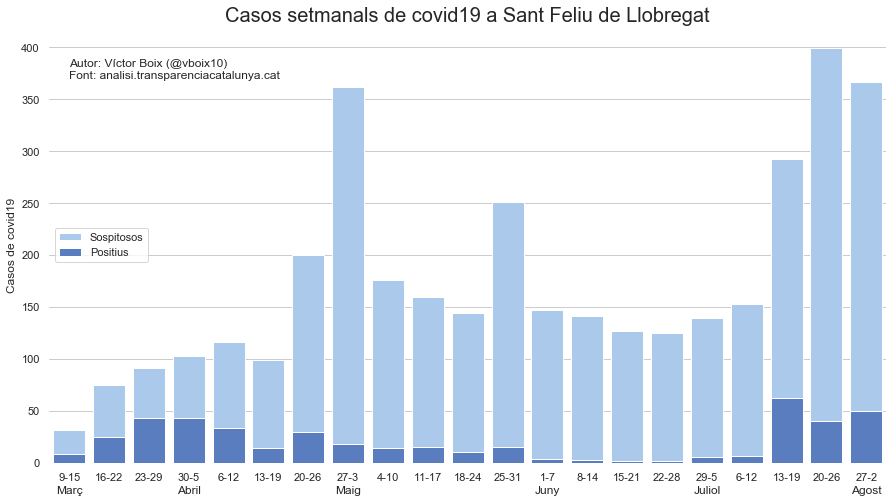

In [5]:
# Visualització de dades

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
sns.barplot(data=casos_setmana, x='setmana', y='numcasos', color='b', label="Sospitosos")

sns.set_color_codes("muted")
sns.barplot(data=positius_setmana, x='setmana', y='numcasos', color='b', label="Positius")

ax.legend(ncol=1, loc="center left", frameon=True)
ax.set_title("Casos setmanals de covid19 a Sant Feliu de Llobregat", fontsize=20)
plt.text(x=0, y=370, s="Autor: Víctor Boix (@vboix10)\nFont: analisi.transparenciacatalunya.cat")

ax.set(xlabel='', ylabel="Casos de covid19")
ax.set_xticklabels(["9-15","16-22","23-29","30-5",  # març
                    "6-12","13-19","20-26","27-3",  #abril
                    "4-10","11-17","18-24","25-31",  #maig
                    "1-7","8-14","15-21","22-28","29-5",  # juny
                    "6-12","13-19","20-26","27-2"])  # juliol

ax.text(0,-30, "Març", ha="center")
ax.text(3,-30, "Abril", ha="center")
ax.text(7,-30, "Maig", ha="center")
ax.text(12,-30, "Juny", ha="center")
ax.text(16,-30, "Juliol", ha="center")
ax.text(20,-30, "Agost", ha="center")

sns.despine(left=True, bottom=True)